1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро). 

In [7]:
import random 
req = 'y'
while req == 'y':
    inpt = int(input('введите число на ставку (от 0 до 36)'))
    res = random.randint(0,37)
    print(f'выпало {res}')
    if req == res:
        print('вы выиграли ставку 1 к 36')
    else:
        print('вы проиграли')
    req = input('сыграем еще раз? (y/n)')    

введите число на ставку (от 0 до 36)2
выпало 35
вы проиграли
сыграем еще раз? (y/n)n


2.1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [17]:
import random 
import numpy as np
from collections import Counter

print('проверка теоремы сложения\n'.upper())
# предлагаю сгенерировать множество испытаний монте-карло и по результату проверить теоремы
# испытание монте-карло на монетке, распределени гаусса
subarray = []
n = 1000
for i in range(n):
    out = np.random.uniform(0,1)
    if out < 0.5:
        res = 'head'
    if out > 0.5:
        res = 'tails'
    subarray.append(res)

p_tails = list(Counter(subarray).values())[0]/n
p_head = list(Counter(subarray).values())[1]/n
print(f'в испытании из {n} экспериментов\n'
    f'орел выпал {list(Counter(subarray).values())[0]} раз\n'
     f'решка выпала {list(Counter(subarray).values())[1]}\n'
     'следовательно, вероятность выпадения\n'
     f'орла составляет {p_tails}, решки - {p_head}\n'
     'проверим следствие - сумма вероятностей противоположных событий равна единице:\n'
     f'действительно, сумма P(A+B) = P(A) + P(B) составила: {p_tails + p_head}')


print('\nпроверка теоремы умножения\n'.upper())
# интересно проверить формулу произведения вероятностей, возьмем независимые события
barrels = []
for i in range(n):
    out = np.random.randint(1,3)
    barrels.append(out)
barrel_one = list(Counter(barrels).values())[0]
barrel_two = list(Counter(barrels).values())[1]
# тут я завис немного, как быстро симудировать выбор двух бочонков одноврменно
# решил сгенерировать две случайные выборки (независимость событий), пройтись по каждому
# шагу генерации и сопоставить эти две выборки - где не совпали, там у меня вероятность одновременно
# вытащить бочонок 1 и 0
sub_1, sub_2 = [], []
for i in range(n):
    out = np.random.randint(1,3)
    sub_1.append(out)
for i in range(n):
    out = np.random.randint(1,3)
    sub_2.append(out)
both = 0
for i in range(n):
    if sub_1[i] != sub_2[i]:
        both += 1
print('предположим, у нас есть черный ящик, в котором находятся бочонки только с номером 1 или 2\n'
     f'для проверки гипотезы проведем {n} испатний монте карло, в котором будем вытаскивать сначала\n'
     f'только один бочонок, посчитаем веротность выпадения каждого номера бочонка,\n'
     f'после одновременно вытаскиваем {n} раз 2 бочонка, вероятность выпадения независимы,\n'
     f'следовательно, вероятность выпадения одновременно бочонка 1 и 2 должна составить\n' 
     f'P(AB) = P(A)*P(B) => {round((barrel_one/n) * (barrel_two/n),2)}, или близкое к этому значение\n'
     f'действительно, при отдельной вероятности выпадения бочонка 1 - {barrel_one/n} и 2 - {barrel_two/n}\n'
     f'эмпирическая веротяность выпадения одновременно 2х бочонков составила {both/n}\n'
     'отклонение результатов симуляции от рассчитанного значения составило',
      round(abs((barrel_one/n) * (barrel_two/n) - both/n),2))

print('\nи я только что опроверг теорему произвдеения вероятностей!!! (шучу)\n'
     'я не монять, в чем ошибка логики, если подскажите, буду признателен!')

ПРОВЕРКА ТЕОРЕМЫ СЛОЖЕНИЯ

в испытании из 1000 экспериментов
орел выпал 479 раз
решка выпала 521
следовательно, вероятность выпадения
орла составляет 0.479, решки - 0.521
проверим следствие - сумма вероятностей противоположных событий равна единице:
действительно, сумма P(A+B) = P(A) + P(B) составила: 1.0

ПРОВЕРКА ТЕОРЕМЫ УМНОЖЕНИЯ

предположим, у нас есть черный ящик, в котором находятся бочонки только с номером 1 или 2
для проверки гипотезы проведем 1000 испатний монте карло, в котором будем вытаскивать сначала
только один бочонок, посчитаем веротность выпадения каждого номера бочонка,
после одновременно вытаскиваем 1000 раз 2 бочонка, вероятность выпадения независимы,
следовательно, вероятность выпадения одновременно бочонка 1 и 2 должна составить
P(AB) = P(A)*P(B) => 0.25, или близкое к этому значение
действительно, при отдельной вероятности выпадения бочонка 1 - 0.487 и 2 - 0.513
эмпирическая веротяность выпадения одновременно 2х бочонков составила 0.49
отклонение результатов сим

2.2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

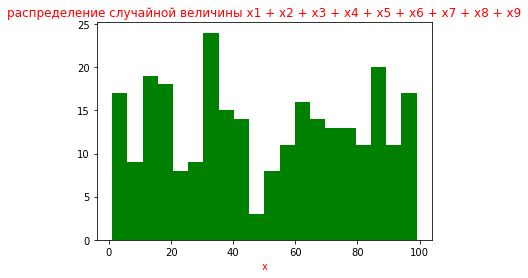

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [np.random.randint(1,100) for i in range(0, 30)]
x2 = [np.random.randint(1,100) for i in range(0, 30)]
x3 = [np.random.randint(1,100) for i in range(0, 30)]
x4 = [np.random.randint(1,100) for i in range(0, 30)]
x5 = [np.random.randint(1,100) for i in range(0, 30)]
x6 = [np.random.randint(1,100) for i in range(0, 30)]
x7 = [np.random.randint(1,100) for i in range(0, 30)]
x8 = [np.random.randint(1,100) for i in range(0, 30)]
x9 = [np.random.randint(1,100) for i in range(0, 30)]
data = x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9
plt.hist(data, bins=20, color ='green', rwidth = 3)
plt.xlabel('x', color = 'red')
plt.title('распределение случайной величины x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9', color = 'red')
plt.show()

3.1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [45]:
# не очень понял задачу, сделаю, как понимаю
import numpy as np

# генерирую симуляцию биноминального распределения
# общее число экспериментов
n = 1000
# общее число испытаний в каждом эксперименте
l = 100
# вероятность наступления события 
k = 0.5
# массив из n элементов, каждый из которых содержит кол-во наступивших событий в выьорке из l испытаний
data = np.random.binomial(l, k, n)
p_emp = np.sum(data)/n
print(f'эмпирическая вероятость события составляет {round(p_emp/100,4)}\n'
     f'погрешность составила {round(abs(k - p_emp/100),4)}')

эмпирическая вероятость события составляет 0.5008
погрешность составила 0.0008


3.2) Повторите расчеты, взяв другие значения n и k.

4. Повторите расчеты, взяв другие значения n и k.

In [49]:
import numpy as np

n = 100
l = 100
k = 0.5

data = np.random.binomial(l, k, n)
p_emp = np.sum(data)/n
print('кол-во симуляций {n}')
print(f'эмпирическая вероятость события составляет {round(p_emp/100,4)}\n'
     f'погрешность составила {round(abs(k - p_emp/100),4)}')

n = 100000
l = 100
k = 0.5

data = np.random.binomial(l, k, n)
p_emp = np.sum(data)/n
print('\nкол-во симуляций {n}')
print(f'эмпирическая вероятость события составляет {round(p_emp/100,4)}\n'
     f'погрешность составила {round(abs(k - p_emp/100),4)}')


кол-во симуляций {n}
эмпирическая вероятость события составляет 0.4898
погрешность составила 0.0102

кол-во симуляций {n}
эмпирическая вероятость события составляет 0.4998
погрешность составила 0.0002


5. Дополните код расчетом коэффициента корреляции x и y по формуле

In [ ]:
import numpy as np

